In [112]:
import requests
import pandas as pd
import seaborn as sns
import regex as re
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Let's start by pulling from the US Census Bureau API. We will use the Annual Community Survey 1-Year Estimates Public Use Microdata sample from 2019. https://data.census.gov/mdat/#/search?ds=ACSPUMS1Y2019&vv=*JWMNP&cv=JWTRNS&rv=ucgid&g=7950000US0603701,0603702,0603703,0603704,0603705,0603706,0603707,0603708,0603709,0603710,0603711,0603712,0603713,0603714,0603715,0603716,0603717,0603718,0603719,0603720,0603721,0603722,0603723,0603724,0603725,0603726,0603727,0603728,0603729,0603730,0603731,0603732,0603733,0603734,0603735,0603736,0603737,0603738,0603739,0603740,0603741,0603742,0603743,0603744,0603745,0603746,0603747,0603748,0603749,0603750,0603751,0603752,0603753,0603754,0603755,0603756,0603757,0603758,0603759,0603760,0603761,0603762,0603763,0603764,0603765,0603766,0603767,0603768,0603769 

We will begin by pulling average commute times by mode of transportation for individuals in 69 Los Angeles Areas.

A total of 102,084 respondents in all 69 geographies responded to the survey. While this is a minor sampling compared to the population of LA, it does offer a statistically significant sample size to review. Only two regions reported less than 1000 respondents. No regions reported less than 850 respondents.

In [80]:
def pull_name(str):
    return ''.join(re.findall('--(.*) PUMA',str))

def start_time(str):
    return re.findall('([0-9]*:[0-9]*[\s](a.m.|p.m.))',str)[0][0]

Average_travel_time_by_departure = pd.read_excel("data\Average Travel time by departure time.xlsx", header = 4)

Average_travel_time_by_departure['Selected Geographies'] = Average_travel_time_by_departure['Selected Geographies'].apply(lambda x: pull_name(x))
del Average_travel_time_by_departure['N/A (not a worker; worker who worked at home)']

new_cols = pd.Series(Average_travel_time_by_departure.columns)[1:]
new_cols = new_cols.apply(lambda x: start_time(x))
new_cols = pd.concat([pd.Series(pd.Series(Average_travel_time_by_departure.columns)[0]),new_cols])

Average_travel_time_by_departure.columns = new_cols
Average_travel_time_by_departure.fillna(0)

,Selected Geographies,12:00 a.m.,12:30 a.m.,1:00 a.m.,1:30 a.m.,2:00 a.m.,2:30 a.m.,3:00 a.m.,3:10 a.m.,3:20 a.m.,...,9:40 p.m.,9:50 p.m.,10:00 p.m.,10:10 p.m.,10:20 p.m.,10:30 p.m.,10:40 p.m.,10:50 p.m.,11:00 p.m.,11:30 p.m.
0,Castaic,45.0,0.0,12.0,0.0,60.0,124.0,47.0,0.0,0.0,...,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Santa Clarita City,142.0,0.0,85.0,0.0,58.0,0.0,29.0,0.0,0.0,...,0.0,30.0,17.0,0.0,0.0,35.0,0.0,0.0,30.0,15.0
2,Lancaster City,0.0,45.0,0.0,60.0,0.0,0.0,91.0,12.0,0.0,...,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,50.0,15.0
3,Palmdale City,10.0,50.0,0.0,90.0,57.0,15.0,83.0,0.0,62.0,...,0.0,0.0,45.0,0.0,80.0,0.0,0.0,0.0,142.0,20.0
4,LA City (Northwest/Chatsworth & Porter Ranch),15.0,10.0,0.0,40.0,0.0,0.0,38.0,0.0,0.0,...,0.0,0.0,15.0,0.0,40.0,29.0,10.0,0.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Long Beach City (East),19.0,35.0,0.0,105.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
65,Long Beach City (Southwest & Port),0.0,0.0,18.0,0.0,142.0,0.0,0.0,17.0,0.0,...,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,LA City (South/San Pedro),15.0,0.0,20.0,15.0,30.0,30.0,31.0,0.0,16.0,...,0.0,0.0,15.0,0.0,0.0,30.0,7.0,5.0,20.0,5.0
67,Palos Verdes Peninsula,0.0,0.0,0.0,83.0,0.0,10.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\mcran\AppData\Local\Temp/ipykernel_48796/842528555.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  set_hist = pd.DataFrame(Average_travel_time_by_departure.mean())


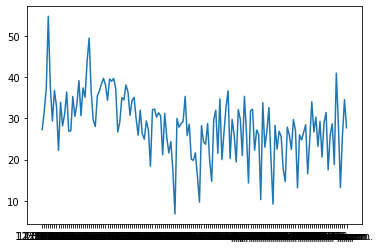

In [105]:
set_hist = pd.DataFrame(Average_travel_time_by_departure.mean())
set_hist = set_hist.reset_index()
set_hist.columns = ['Time','Average Commute']
plt.plot(set_hist['Time'],set_hist['Average Commute'])


In [123]:
date = pd.to_datetime('7/16/2022')
time_series = pd.DataFrame(date + pd.to_timedelta(np.arange(1440),'m'),columns=['Timestamp'])
time_series['Timestamp'] = pd.Series([val.time() for val in time_series['Timestamp']])
time_series['Remaining Commute'] = 0
time_series

,Timestamp,Remaining Commute
0,00:00:00,0
1,00:01:00,0
2,00:02:00,0
3,00:03:00,0
4,00:04:00,0
...,...,...
1435,23:55:00,0
1436,23:56:00,0
1437,23:57:00,0
1438,23:58:00,0


In [141]:
test = new_cols[1:].apply(lambda x: datetime.strptime(x.strip(' a.m.').strip(' p.m.'), '%H:%M'))
test =  pd.Series([val.time() for val in test])
test

0      12:00:00
1      12:30:00
2      01:00:00
3      01:30:00
4      02:00:00
         ...   
145    10:30:00
146    10:40:00
147    10:50:00
148    11:00:00
149    11:30:00
Length: 150, dtype: object

'1:30'